# IMPORTING MODULES

In [1]:
import numpy as np

# dataa split
from sklearn.model_selection import train_test_split

# model Evaluation
from sklearn import metrics

#navie bayesian and accuracy
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
import seaborn as sns
import plotly.express as px

# SMOTE
from imblearn.over_sampling import SMOTE

# scaling
from sklearn.preprocessing import StandardScaler

# tune
from sklearn.model_selection import RandomizedSearchCV


# READING THE DATASET

In [3]:
data=pd.read_csv('dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3422,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3423,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3424,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


# DATA ENCODING (PREPARATION)

In [4]:
# convert string to numeric using map

# gender
data['gender'] = data['gender'].map({
'Male': int(0),
'Female':int(1),
'Other':int(2)})

# ever_married
data['ever_married'] =data['ever_married'].map({
'Yes':int(1), 
'No':int(0)})

# work_type
data['work_type'] = data['work_type'].map({
'Private':int(3), 
'Self-employed':int(4),
'Govt_job':int(2), 
'children':int(1), 
'Never_worked':int(0)})

# Residence_type
data['Residence_type'] = data['Residence_type'].map({
'Urban':int(2), 
'Rural':int(1)})

# smoking_status
data['smoking_status'] = data['smoking_status'].map({
'formerly smoked':int(1),
'never smoked':int(2), 
'smokes':int(3),
'Unknown':int(0)})

In [5]:
### attributes used in the classification

In [6]:
x=data[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y=data[['stroke']]
x=x.values
y=y.values

# SPLIT DATASET 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(2740, 10)
(686, 10)


In [10]:
y_train=y_train.flatten()
y_test=y_test.flatten()
print(y_train.shape)
print(y_test.shape)

(2740,)
(686,)


# Different numbers of hidden nodes

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import math

In [12]:
testerr=[]

In [13]:
hiddennodes=[1,2,3,math.sqrt(11),(math.sqrt(11))/2]

In [14]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1,activation='relu'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=1)
test_loss = history.history['val_loss']
testerr.append(test_loss)

86/86 [==============================] - 1s 5ms/step - loss: 14.4723 - accuracy: 0.0509 - val_loss: 14.2712 - val_accuracy: 0.0641


In [15]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(2,activation='relu'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=1)
test_loss = history.history['val_loss']
testerr.append(test_loss)

86/86 [==============================] - 0s 2ms/step - loss: 14.4484 - accuracy: 0.3214 - val_loss: 14.2156 - val_accuracy: 0.4082


In [16]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(3,activation='relu'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=1)
test_loss = history.history['val_loss']
testerr.append(test_loss)

86/86 [==============================] - 0s 3ms/step - loss: 9.9244 - accuracy: 0.0481 - val_loss: 9.8439 - val_accuracy: 0.0641


In [17]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(math.sqrt(11),activation='relu'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=1)
test_loss = history.history['val_loss']
testerr.append(test_loss)

86/86 [==============================] - 0s 2ms/step - loss: 9.2727 - accuracy: 0.9519 - val_loss: 8.3349 - val_accuracy: 0.9359


In [18]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense((math.sqrt(11))/2,activation='relu'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),verbose=1)
test_loss = history.history['val_loss']
testerr.append(test_loss)

86/86 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.9530 - val_loss: 0.9894 - val_accuracy: 0.9359


In [19]:
print(testerr)

[[14.27115249633789], [14.215579986572266], [9.843886375427246], [8.334875106811523], [0.9893553256988525]]


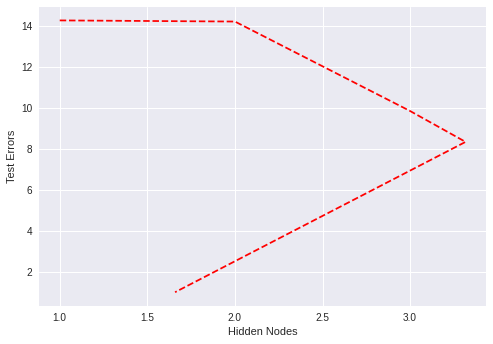

In [20]:
plt.plot(hiddennodes, testerr, 'r--')
plt.xlabel('Hidden Nodes')
plt.ylabel('Test Errors')
plt.show();

## INFERENCES

The above graph shows that Test error is high at Hidden node 1 and 2. 

When it increases, the test error decreases.

When hidden node is half of sqrt(attributes), it even decreases.

As the process goes, the test error decreases. 